In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

## Model Setup

In [4]:
print(os.getcwd())
model = YOLO('./../../runs/detect_yolo8n_wild_boar+deer/yolov8n_deer_and_wild_boar2024-11-20 14_38_43.108048.pt')

c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation


In [5]:
def extract_values(results, class_counts, folder):
    x = 0
    
    for result in results:
        x+=1
        # print(f"\n\n\033[4mBild Nummer{x}\033[0m\n")
        if result.boxes.cls.numel() != 0:
            for box in result.boxes:
                class_counts[folder][str(int(box.cls))] += 1
        else:
            class_counts[folder]["no_deer_or_wild_boar"] += 1 
    return class_counts
# extract_values(results, class_counts, folder)

## Evaluation of Pictures

In [6]:
folders = os.listdir("./../../.data/evaluation/img/vergleich/erkennungsgenauigkeit")
# 0 = deer; 1 = wild_boar
classes = ["0", "1", "no_deer_or_wild_boar"]
class_counts = {'deer': {cls: 0 for cls in classes},
                'no_animal': {cls: 0 for cls in classes},
                'no_deer': {cls: 0 for cls in classes}}

for folder in folders:
    print(f"{folder}")
    results = model.predict(source=f"./../../.data/evaluation/img/vergleich/erkennungsgenauigkeit/{folder}")
    class_counts = extract_values(results, class_counts, folder)
class_counts

deer

image 1/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01010067.JPG: 480x640 2 wild_boars, 100.2ms
image 2/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01010069.JPG: 480x640 1 deer, 1 wild_boar, 56.5ms
image 3/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01020035.JPG: 480x640 3 wild_boars, 59.9ms
image 4/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\erkennungsgenauigkeit\deer\01020036.JPG: 480x640 3 deers, 1 wild_boar, 70.5ms
image 5/42 c:\Users\Z0127829\O

KeyboardInterrupt: 

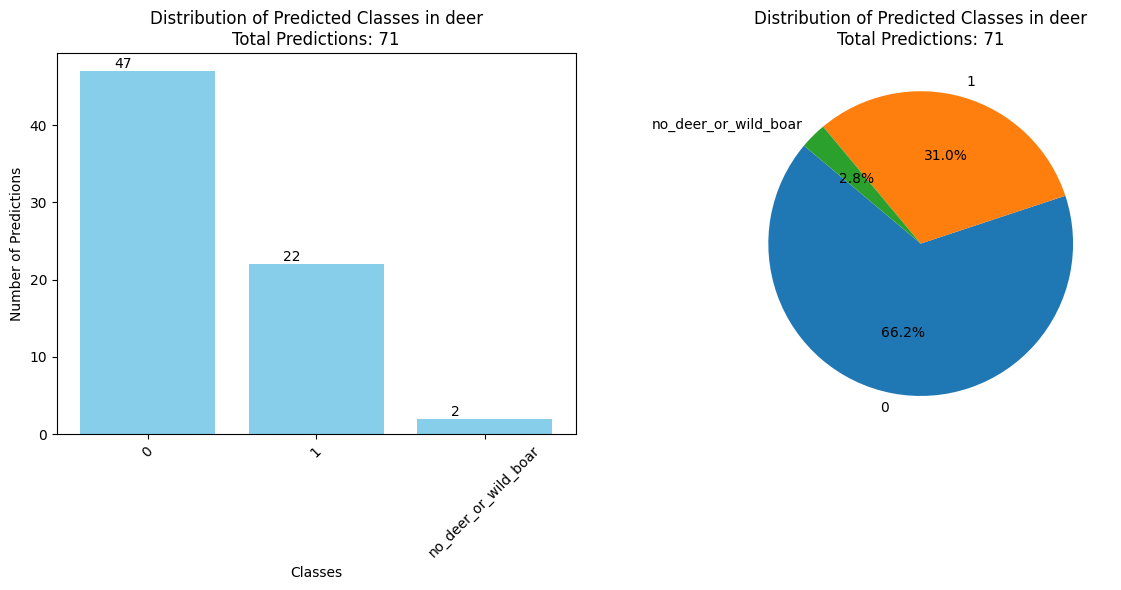

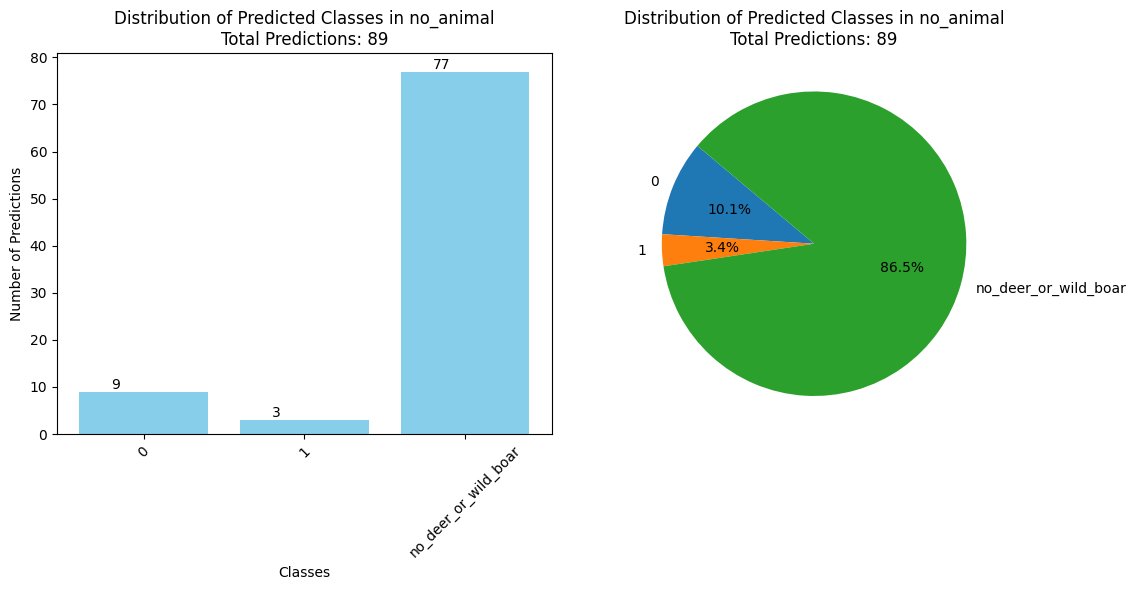

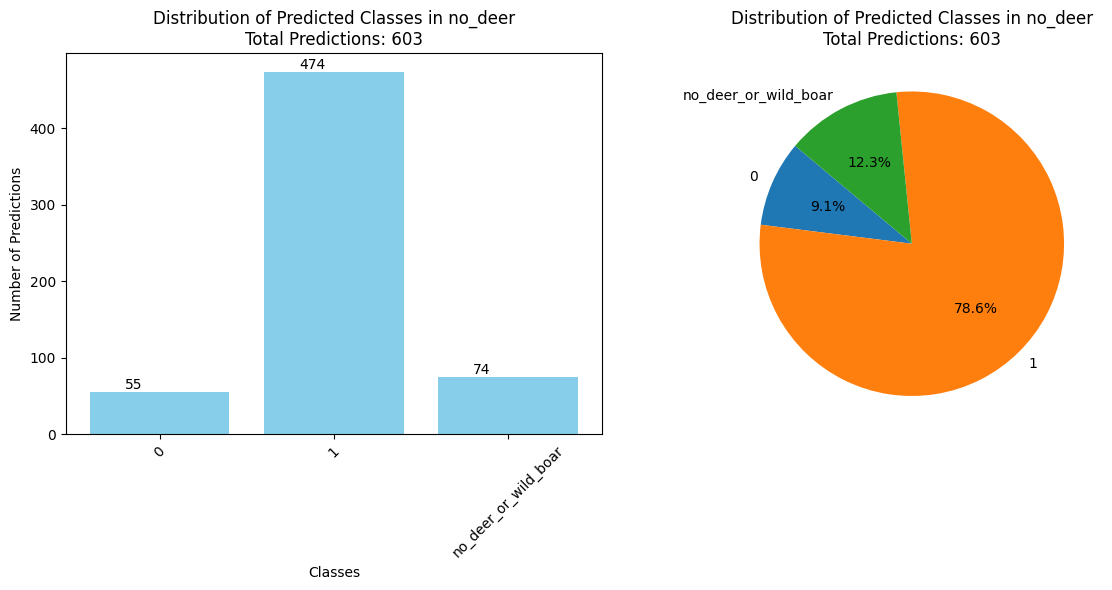

In [7]:
for folder in folders:
    # Total number of predictions for the current folder
    total_predictions = sum(class_counts[folder].values())

    # Bar chart
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bars = plt.bar(class_counts[folder].keys(), class_counts[folder].values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Predictions')
    plt.title(f'Distribution of Predicted Classes in {folder}\nTotal Predictions: {total_predictions}')
    plt.xticks(rotation=45)

    # Adding exact numbers above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, yval, round(yval, 2), va='bottom')

    # Removing classes with 0 predictions for the pie chart
    nonzero_class_counts = {cls: count for cls, count in class_counts[folder].items() if count > 0}

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(nonzero_class_counts.values(), labels=nonzero_class_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Predicted Classes in {folder}\nTotal Predictions: {total_predictions}')

    plt.tight_layout()
    plt.show()